<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/BayesianBandits_Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thompson Sampling / Bayesian Bandits** - Bernoulli Distribution

Typically:
- Optimal bandit get played a lot more than suboptimal ones
- Optimal bandit's posterior gets taller and skinnier, while the suboptimal ones' remain flat and fat, with low means

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta  # Beta distribution, for plotting PDF for each bandit

In [0]:
# np.random.seed(2)
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, p):
    self.p = p
    # uniform distribution if no prior domain knowledge
    self.a = 1
    self.b = 1
    self.N = 0 # for information only

  def pull(self):
    return np.random.random() < self.p  # 1 with probability p

  def sample(self):
    return np.random.beta(self.a, self.b)  # can also use scipy beta module

  def update(self, x):
    # the posterior becomes the prior on each iteration
    self.a += x
    self.b += 1 - x
    self.N += 1  # sample by sample, without first accumulating samples

In [0]:
def plot(bandits, trial):
  x = np.linspace(0, 1, 200)  # np.array for x axis for each PDF
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)  # PDF for bandit's beta distribution for each value in x array
    plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")  # plotting PDF
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()
  # 0 at 0 or 1 if certain that it doesn't always lose or win

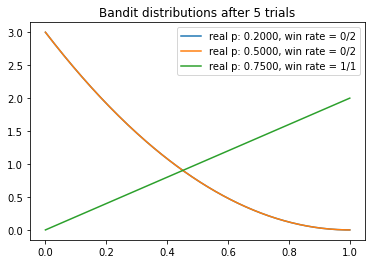

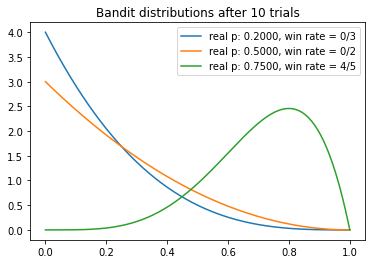

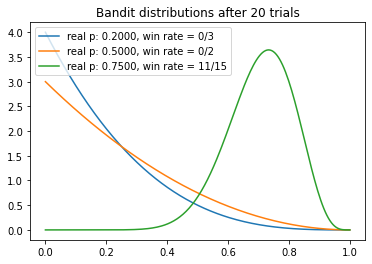

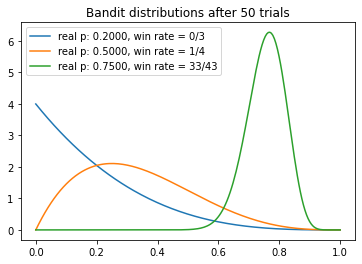

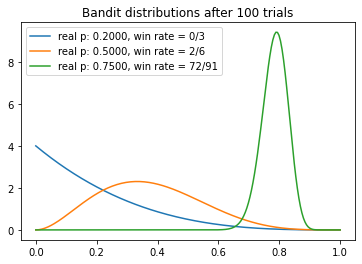

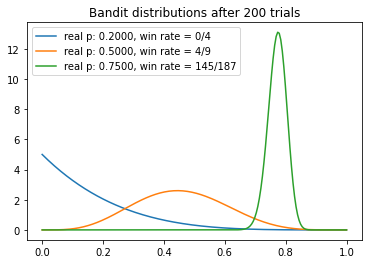

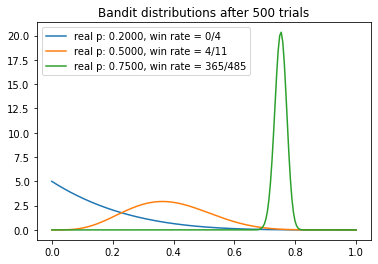

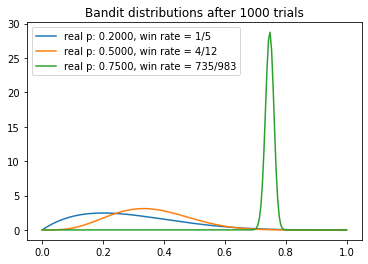

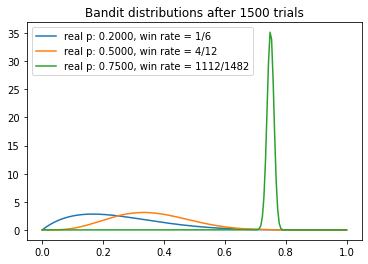

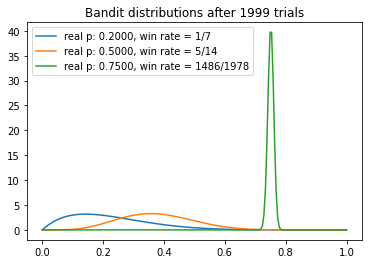

total reward earned: 1493.0
overall win rate: 0.7465
num times selected each bandit: [7, 14, 1979]


In [0]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
rewards = np.zeros(NUM_TRIALS)
for i in range(NUM_TRIALS):
  # Thompson sampling
  j = np.argmax([b.sample() for b in bandits])  # bandit that yields the largest sample from its current beta posterior

  # plot the posteriors
  if i in sample_points:
    plot(bandits, i)

  # pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # update rewards
  rewards[i] = x

  # update the distribution for the bandit whose arm we just pulled
  bandits[j].update(x)

# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N for b in bandits])